In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Veri Seti Hakkında

Ecotect'te simüle edilen 12 farklı bina şeklini kullanarak enerji analizi yapıyoruz. Binalar, diğer parametrelerin yanı sıra cam alanı, cam alanı dağılımı ve yönelim açısından farklılık gösterir. 768 yapı şekli elde etmek için çeşitli ayarları yukarıda belirtilen özelliklerin işlevleri olarak simüle ediyoruz. Veri seti, iki gerçek değerli yanıtı tahmin etmeyi amaçlayan 768 örnek ve 8 özellik içerir. Yanıt en yakın tam sayıya yuvarlanırsa, çok sınıflı bir sınıflandırma problemi olarak da kullanılabilir.

Öznitelik Bilgileri: Veri kümesi sekiz öznitelik (veya X1...X8 ile gösterilen özellikler) ve iki yanıt (veya y1 ve y2 ile gösterilen sonuçlar) içerir. Amaç, iki yanıtın her birini tahmin etmek için sekiz özelliği kullanmaktır.

- X1: Bağıl Kompaktlık
- X2: Yüzey Alanı
- X3: Duvar Alanı
- X4: Çatı Alanı
- X5: Toplam Yükseklik
- X6: Yönlendirme
- X7: Cam Alanı
- X8: Cam Alanı Dağılımı
- Y1: Isıtma Yükü
- Y2: Soğutma Yükü

In [2]:
df=pd.read_excel("ENB2012_data.xlsx")
# veri seti yüklendi

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()
# Veri seti ile ilgili ön bilgiler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.shape
# veri setinin boyutu

(768, 10)

Aşağıda merkezi eğilim ölçüleri üzerinden tüm değişkenlerin standart sapması, ortalaması ve çeyreklik değerleri görülmektedir.

In [6]:
# Veri setinin istatistiksel özelliklerini inceleyelim.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


Yine aşağıda tüm değişkenler için varyans değerleri görülmektedir.

In [7]:
df.var()

X1       0.011189
X2    7759.163842
X3    1903.269883
X4    2039.963060
X5       3.066493
X6       1.251630
X7       0.017748
X8       2.405476
Y1     101.812216
Y2      90.502983
dtype: float64

In [8]:
# bağımsız değişkenlerin, bağımlı değişken Y1 ile olan ilişkileri
df.corr()['Y1'].sort_values()

X4   -0.861828
X2   -0.658120
X6   -0.002587
X8    0.087368
X7    0.269842
X3    0.455671
X1    0.622272
X5    0.889430
Y2    0.975862
Y1    1.000000
Name: Y1, dtype: float64

In [9]:
# bağımsız değişkenlerin, bağımlı değişken Y2 ile olan ilişkileri
df.corr()['Y2'].sort_values()

X4   -0.862547
X2   -0.672999
X6    0.014290
X8    0.050525
X7    0.207505
X3    0.427117
X1    0.634339
X5    0.895785
Y1    0.975862
Y2    1.000000
Name: Y2, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score

In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Linear Regression

Linear regression, değişkenler arasında doğrusal bir bağlantı olduğunda bunu açıklayabilmek amacı ile kullanılan, istatistik tabanlı bir makine öğrenmesi modelidir.

## Y1 değişkeni için Linear Regression

In [12]:
# Y1 için
X=df.iloc[:,0:8]
Y=df.iloc[:,8:9]

In [13]:
X.shape,Y.shape

((768, 8), (768, 1))

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 8), (576, 1), (192, 8), (192, 1))

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [19]:
r2=dict()

In [20]:
print('Train Veri Setinin Doğruluk Skoru:', lr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', lr.score(X_test,Y_test))
print('Lineer Regression: {}'.format(cross_val_score(lr, X, Y, cv=5, scoring='r2').mean()))
print('R^2: {}'.format(r2_score(Y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y1 için Tüm Özellikler ile Lineer Regression R2']=(cross_val_score(lr, X, Y, cv=5, scoring='r2').mean())

Train Veri Setinin Doğruluk Skoru: 0.9222832292256767
Test Veri Setinin Doğruluk Skoru: 0.8968857396363105
Lineer Regression: 0.8878636769754561
R^2: 0.8968857396363105
MSE: 0.10311426036368958
RMSE: 0.3211140924401942
MAE: 0.232087605069509


## Y1 İÇİN Değişken Seçimi

Bu kısımda Y1 bağımlı değişkeni ile X'ler arasındaki ilişkilere bakılarak, geriye eleme yöntemi ile kullanılacak özellikler seçilecektir.

Bu adımda seçilen özellikler ile tüm özelliklerin bir arada olduğu model başarıları karşılaştırlacak, eğer seçilen özellikler tüm özelliklerin performansından daha etkili ise bundan sonraki bütün Y1 için tahminleme yapan modellerde bu seçilen özellikler kullanılacaktır. 

### Backward Elimination (Geriye Eleme)

P value değeri en yüksek olan özellikler elenir.

Bütün değişkenlerde P-value<0.05 durumu sağlanana kadar işleme devam edilir. Ve bu durumu sağlayan değişkenler seçilir.

In [21]:
import statsmodels.api as sm

In [22]:
# Theta0 değerleri eklendi (görünmeyen gizli 1'ler dizisi).
theta=np.append(arr=np.ones((len(df),1)).astype(int),values=X, axis=1)

In [23]:
x_list_y1=df.iloc[:,[0,1,2,3,4,5,6,7]].values
x_list_y1=np.array(x_list_y1,dtype=float)

In [24]:
hedef=df.iloc[:,8:9].values

In [25]:
model=sm.OLS(hedef,x_list_y1).fit()

In [26]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7347.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:19:34   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3858.
Df Residuals:                     761   BIC:                                      3891.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -20.0442      1.806    -11.101      0.000     -23.589     -16.500
x2            -0.0037      0.001     -2.912      0.004      -0.006      -0.001
x3             0.0322      0.004      8.497      0.000       0.025       0.040
x4            -0.0179      0.002     -7.352      0.000      -0.023      -0.013
x5             5.2968      0.224     23.627      0.000       4.857       5.737
x6            -0.0161      0.096     -0.167      0.867      -0.204       0.172
x7            19.9608      0.824     24.231      0.000      18.344      21.578
x8             0.2063      0.071      2.916      0.004       0.067       0.345
==============================================================================
Omnibus:                       13.549   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.976
Skew:                          -0.005   Prob(JB):                     6.22e-06
Kurtosis:                       3.866   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

X6 değişkeni backward elimination'a göre elenmelidir. Eleyerek devam edelim.

### X6 değişkeni çıkartılıyor

In [27]:
x_list_y1=df.iloc[:,[0,1,2,3,4,6,7]].values
x_list_y1=np.array(x_list_y1,dtype=float)

In [28]:
model=sm.OLS(hedef,x_list_y1).fit()

In [29]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8582.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:19:34   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3856.
Df Residuals:                     762   BIC:                                      3884.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -20.0741      1.796    -11.180      0.000     -23.599     -16.549
x2            -0.0037      0.001     -2.997      0.003      -0.006      -0.001
x3             0.0322      0.004      8.503      0.000       0.025       0.040
x4            -0.0180      0.002     -7.375      0.000      -0.023      -0.013
x5             5.2960      0.224     23.643      0.000       4.856       5.736
x6            19.9608      0.823     24.246      0.000      18.345      21.577
x7             0.2063      0.071      2.917      0.004       0.067       0.345
==============================================================================
Omnibus:                       13.560   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.002
Skew:                          -0.005   Prob(JB):                     6.14e-06
Kurtosis:                       3.866   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Bütün özelliklerin p-value değerleri kabul edilebilir seviyede olduğundan model oluşturabiliriz.

Yani X6 özelliği haricindeki diğer bağımsız özellikler, bağımlı özellik Y1'i en iyi şekilde açıklamaktadır.

## Özellik seçimi sonrasında oluşturulan yeni model

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y1,Y,test_size=0.25,random_state=1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [32]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 7), (576, 1), (192, 7), (192, 1))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [35]:
print('Train Veri Setinin Doğruluk Skoru:', lr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', lr.score(X_test,Y_test))
print('Lineer Regression: {}'.format(cross_val_score(lr, x_list_y1, Y, cv=5, scoring='r2').mean()))
print('R^2: {}'.format(r2_score(Y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y1 için X6 Olmadan Linear Regression (7 özellik ile) R2']=cross_val_score(lr, x_list_y1, Y, cv=5, scoring='r2').mean()

Train Veri Setinin Doğruluk Skoru: 0.922277546136553
Test Veri Setinin Doğruluk Skoru: 0.8969692232416823
Lineer Regression: 0.8919081856677012
R^2: 0.8969692232416823
MSE: 0.10303077675831777
RMSE: 0.32098407555253855
MAE: 0.23179020966436562


In [36]:
errors=list()

In [37]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [38]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [39]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

Özellik seçimi sonrasında oluşturulan yeni model eskiye göre biraz daha iyi olduğundan yolumuza bu yeni model ile devam ediyoruz.

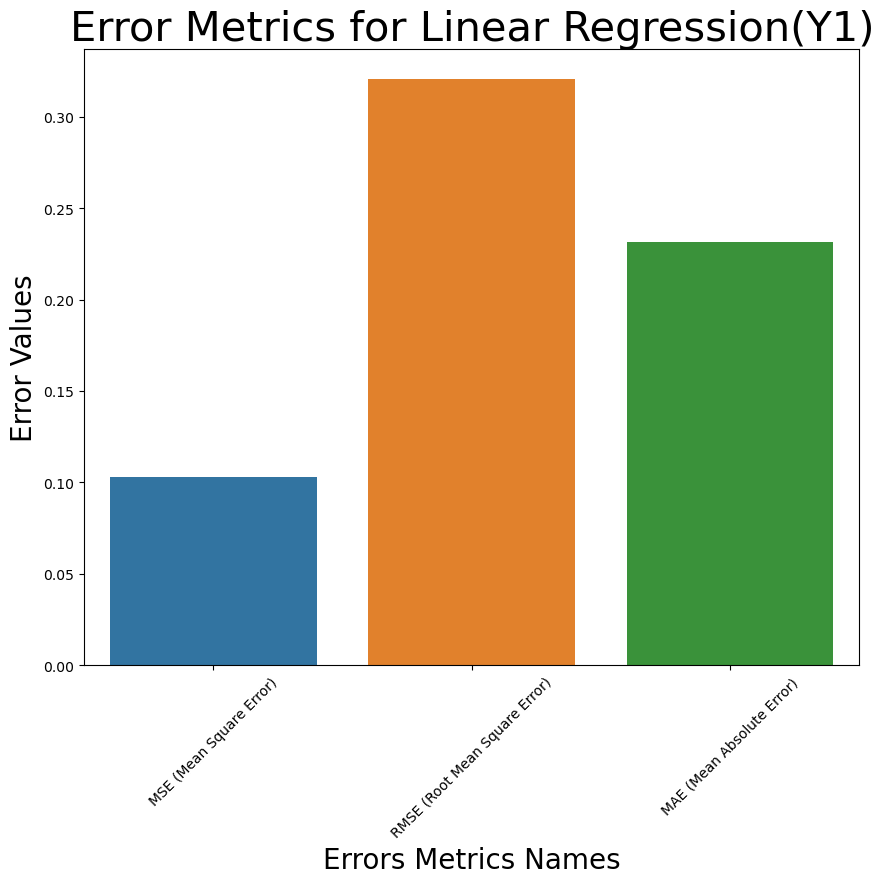

In [40]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Linear Regression(Y1)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

## Y2 değişkeni için Linear Regression

In [41]:
# Y2 için
X=df.iloc[:,0:8]
Y=df.iloc[:,9:10]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [44]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 8), (576, 1), (192, 8), (192, 1))

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [47]:
print('Train Veri Setinin Doğruluk Skoru:', lr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', lr.score(X_test,Y_test))
print('Lineer Regression: {}'.format(cross_val_score(lr, X, Y, cv=5, scoring='r2').mean()))
print('R^2: {}'.format(r2_score(Y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y2 için Tüm özellikler ile Linear Regression R2']=cross_val_score(lr, X, Y, cv=5, scoring='r2').mean()

Train Veri Setinin Doğruluk Skoru: 0.8973554559775561
Test Veri Setinin Doğruluk Skoru: 0.8576769181934306
Lineer Regression: 0.8740293068865339
R^2: 0.8576769181934306
MSE: 0.1423230818065693
RMSE: 0.3772573151133975
MAE: 0.27484669224281044


## Y2 İÇİN Değişken Seçimi

Bu kısımda Y2 bağımlı değişkeni ile X'ler arasındaki ilişkilere bakılarak, geriye eleme yöntemi ile kullanılacak özellikler seçilecektir.

Bu adımda seçilen özellikler ile tüm özelliklerin bir arada olduğu model başarıları karşılaştırlacak, eğer seçilen özellikler tüm özelliklerin performansından daha etkili ise bundan sonraki bütün Y2 için tahminleme yapan modellerde bu seçilen özellikler kullanılacaktır.

### Backward Elimination (Geriye Eleme)

P value değeri en yüksek olan özellikler elenir.

Bütün değişkenlerde P-value<0.05 durumu sağlanana kadar işleme devam edilir.

In [48]:
import statsmodels.api as sm

In [49]:
x_list_y2=df.iloc[:,[0,1,2,3,4,5,6,7]].values
x_list_y2=np.array(x_list_y2,dtype=float)

In [50]:
hedef2=df.iloc[:,9:10].values

In [51]:
model=sm.OLS(hedef2,x_list_y2).fit()

In [52]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7132.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:19:34   Log-Likelihood:                         -1990.2
No. Observations:                 768   AIC:                                      3994.
Df Residuals:                     761   BIC:                                      4027.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -19.0135      1.973     -9.638      0.000     -22.886     -15.141
x2             0.0021      0.001      1.522      0.128      -0.001       0.005
x3             0.0180      0.004      4.343      0.000       0.010       0.026
x4            -0.0079      0.003     -2.977      0.003      -0.013      -0.003
x5             5.5881      0.245     22.812      0.000       5.107       6.069
x6             0.1299      0.105      1.241      0.215      -0.076       0.335
x7            14.7496      0.900     16.386      0.000      12.983      16.517
x8             0.0436      0.077      0.564      0.573      -0.108       0.195
==============================================================================
Omnibus:                       77.438   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.254
Skew:                           0.596   Prob(JB):                     2.15e-36
Kurtosis:                       4.927   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

X8 değişkeni backward elimination'a göre elenmelidir. Eleyerek devam edelim.

In [53]:
x_list_y2=df.iloc[:,[0,1,2,3,4,5,6]].values
x_list_y2=np.array(x_list_y2,dtype=float)

In [54]:
model=sm.OLS(hedef2,x_list_y2).fit()

In [55]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8329.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:19:35   Log-Likelihood:                         -1990.4
No. Observations:                 768   AIC:                                      3993.
Df Residuals:                     762   BIC:                                      4021.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -18.9617      1.970     -9.626      0.000     -22.829     -15.095
x2             0.0022      0.001      1.578      0.115      -0.001       0.005
x3             0.0180      0.004      4.344      0.000       0.010       0.026
x4            -0.0079      0.003     -2.966      0.003      -0.013      -0.003
x5             5.5894      0.245     22.829      0.000       5.109       6.070
x6             0.1299      0.105      1.242      0.215      -0.076       0.335
x7            14.8578      0.879     16.902      0.000      13.132      16.583
==============================================================================
Omnibus:                       77.227   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.387
Skew:                           0.594   Prob(JB):                     2.01e-36
Kurtosis:                       4.931   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

X6 değişkeni backward elimination'a göre elenmelidir. Eleyerek devam edelim.

In [56]:
x_list_y2=df.iloc[:,[0,1,2,3,4,6]].values
x_list_y2=np.array(x_list_y2,dtype=float)

In [57]:
model=sm.OLS(hedef2,x_list_y2).fit()

In [58]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              9987.
Date:                Wed, 24 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:19:35   Log-Likelihood:                         -1991.2
No. Observations:                 768   AIC:                                      3992.
Df Residuals:                     763   BIC:                                      4016.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -18.7194      1.961     -9.547      0.000     -22.569     -14.870
x2             0.0025      0.001      1.842      0.066      -0.000       0.005
x3             0.0180      0.004      4.338      0.000       0.010       0.026
x4            -0.0077      0.003     -2.905      0.004      -0.013      -0.003
x5             5.5955      0.245     22.850      0.000       5.115       6.076
x6            14.8580      0.879     16.896      0.000      13.132      16.584
==============================================================================
Omnibus:                       77.558   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.324
Skew:                           0.595   Prob(JB):                     1.26e-36
Kurtosis:                       4.936   Cond. No.                     3.21e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.42e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Değişkenler p-value değerleri kabul edilebilir seviyeye indirgenmiştir. Şimdi modelimizi kurabiliriz.

Yani X8 ve X6 haricindeki diğer özellikler, bağımlı özellik Y2'yi en iyi şekilde açıklamaktadır.

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y2,Y,test_size=0.25,random_state=1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 6), (576, 1), (192, 6), (192, 1))

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
y_pred=lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [64]:
print('Train Veri Setinin Doğruluk Skoru:', lr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', lr.score(X_test,Y_test))
print('Lineer Regression: {}'.format(cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()))
print('R^2: {}'.format(r2_score(Y_test,y_pred)))
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y2 için X8 ve X6 değişkenleri olmadan Linear Regression R2']=cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()

Train Veri Setinin Doğruluk Skoru: 0.896630304688929
Test Veri Setinin Doğruluk Skoru: 0.8592438963773696
Lineer Regression: 0.8783398894008615
R^2: 0.8592438963773696
MSE: 0.14075610362263025
RMSE: 0.3751747641068496
MAE: 0.27365538873037754


In [65]:
r2

{'Y1 için Tüm Özellikler ile Lineer Regression R2': 0.8878636769754561,
 'Y1 için X6 Olmadan Linear Regression (7 özellik ile) R2': 0.8919081856677012,
 'Y2 için Tüm özellikler ile Linear Regression R2': 0.8740293068865339,
 'Y2 için X8 ve X6 değişkenleri olmadan Linear Regression R2': 0.8783398894008615}

Özellik seçimi sonrasında oluşturulan yeni model, eskiye göre daha iyi olduğundan yolumuza bu yeni model ile devam ediyoruz.

Görüldüğü gibi seçilen özellikler ile hem Y1 hem de Y2 için performans arttığı için bundan sonraki tüm modellerde seçilen X'ler ile yola devam edilmelidir.

In [66]:
errors=list()

In [67]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [68]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [69]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

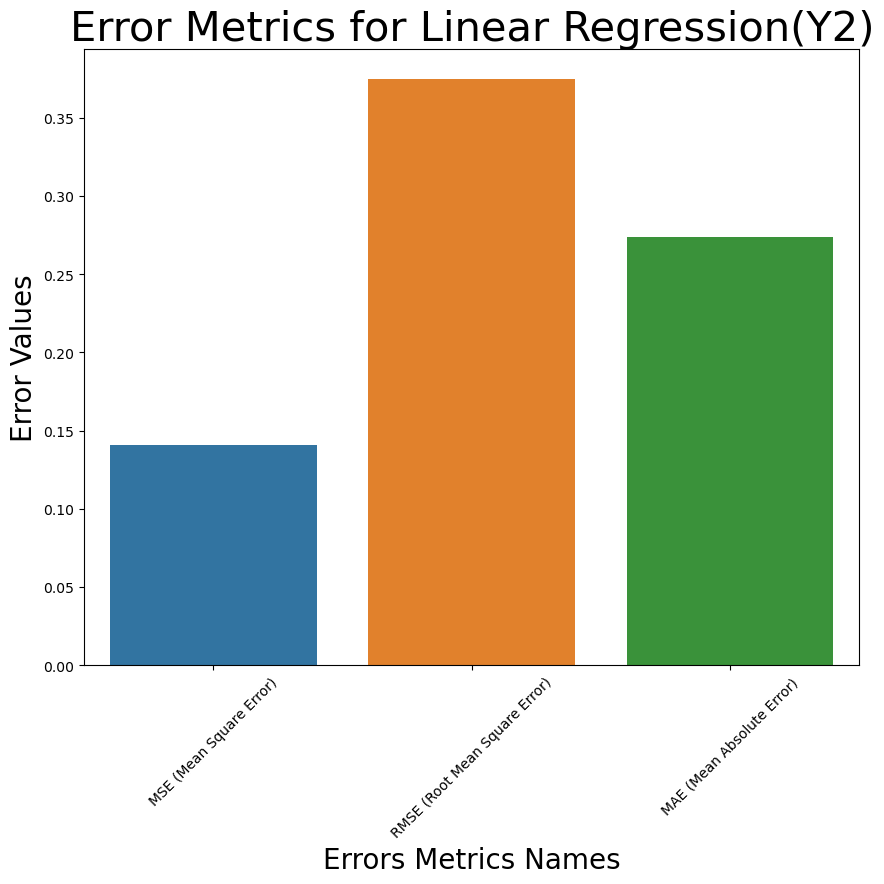

In [70]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Linear Regression(Y2)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

# SVR (Support Vector Regression)

SVR algoritması aykırı değerlere karşı dirençsiz olduğundan model oluşturmadan verileri scale etmemiz gerekiyor.

SVR, aslında linear regressiona benzer şekilde verileri doğrusal ya da dağılımına göre doğrusal olmayan şekillerde ifade eder. Fakat regressiondan en büyük farkı, içerdiği marjinler(alt ve üst sınırları) ile verilerin çizilen tahmin çizgisine olan yakınlığına göre bir hata değeri hesaplamasıdır. Genellikle sınıflandırma kullanılır ve en iyi marjin en uzak olan marjin olarak kabul görür.

## Y1 değişkeni için Support Vector Regression

In [71]:
Y=df.iloc[:,8:9]

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y1,Y,test_size=0.25,random_state=1)

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 7), (576, 1), (192, 7), (192, 1))

In [75]:
X_scaled=sc.fit_transform(x_list_y1)
Y_scaled=sc.fit_transform(Y)

In [76]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,Y_train)

C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [77]:
y_pred=svr.predict(X_test)
y_pred_train = svr.predict(X_train)

In [78]:
print('Train Veri Setinin Doğruluk Skoru:', svr.score(X_train,Y_train));
print('Test Veri Setinin Doğruluk Skoru:', svr.score(X_test,Y_test));
print('Support Vector Regression Cross Validation(K=5) R^2 Score: {}'\
      .format(cross_val_score(svr, X_scaled, Y_scaled, cv=5, scoring='r2').mean()));
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y1 için X6 Olmadan Support Vector Regression (7 özellik ile) R2']=cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()

C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train Veri Setinin Doğruluk Skoru: 0.9624689051925291
Test Veri Setinin Doğruluk Skoru: 0.944221765951223
Support Vector Regression Cross Validation(K=5) R^2 Score: 0.9107212558337212
MSE: 0.055778234048777
RMSE: 0.23617416041721626
MAE: 0.15732168903693086


C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [79]:
errors=list()

In [80]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [81]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [82]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

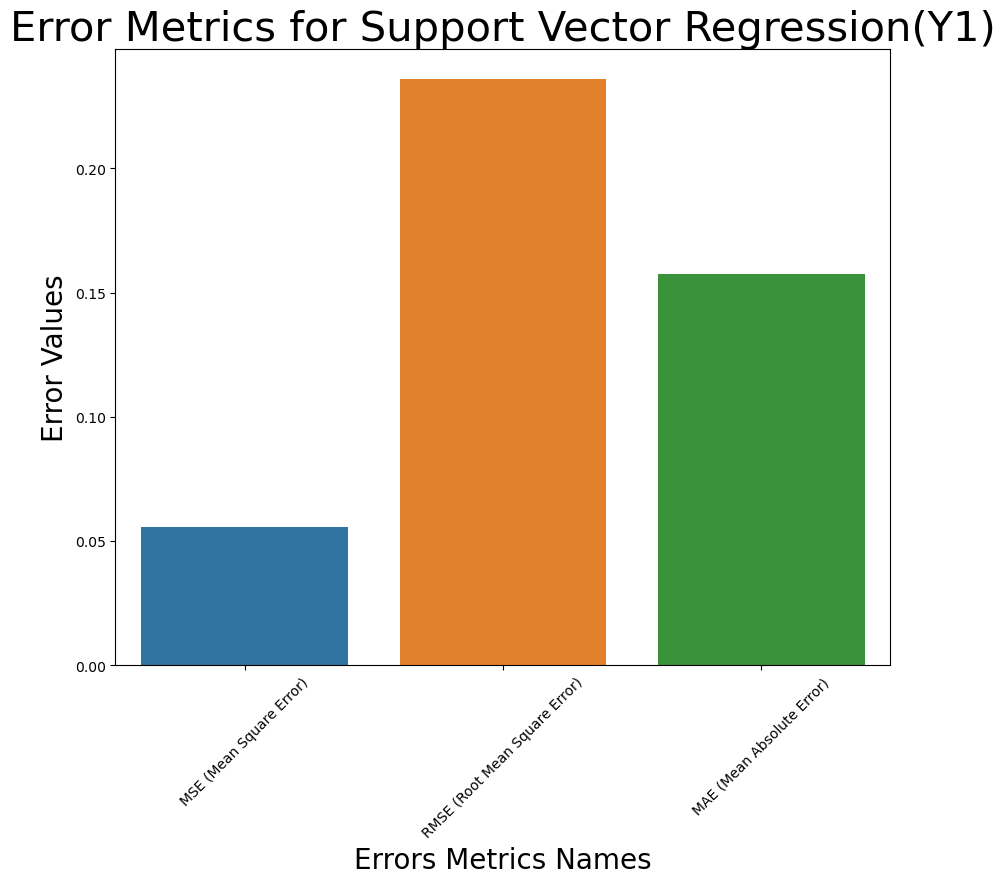

In [83]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Support Vector Regression(Y1)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

## Y2 değişkeni için Support Vector Regression

In [84]:
Y=df.iloc[:,9:10]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y2,Y,test_size=0.25,random_state=1)

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [87]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 6), (576, 1), (192, 6), (192, 1))

In [88]:
X_scaled=sc.fit_transform(x_list_y2)
Y_scaled=sc.fit_transform(Y)

In [89]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,Y_train)

C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [90]:
y_pred=svr.predict(X_test)
y_pred_train = svr.predict(X_train)

In [91]:
print('Train Veri Setinin Doğruluk Skoru:', svr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', svr.score(X_test,Y_test))
print('Support Vector Regression Cross Validation(K=5) R^2 Score: {}'\
      .format(cross_val_score(svr, X_scaled, Y_scaled, cv=5, scoring='r2').mean()));
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y2 için X8 ve X6 değişkenleri olmadan Support Vector Regression R2']=cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()

C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Train Veri Setinin Doğruluk Skoru: 0.9419283692061925
Test Veri Setinin Doğruluk Skoru: 0.9152899282938616
Support Vector Regression Cross Validation(K=5) R^2 Score: 0.9287204398025175
MSE: 0.08471007170613838
RMSE: 0.2910499470986696
MAE: 0.21632438858014158


C:\Users\Crash\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [92]:
errors=list()

In [93]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [94]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [95]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

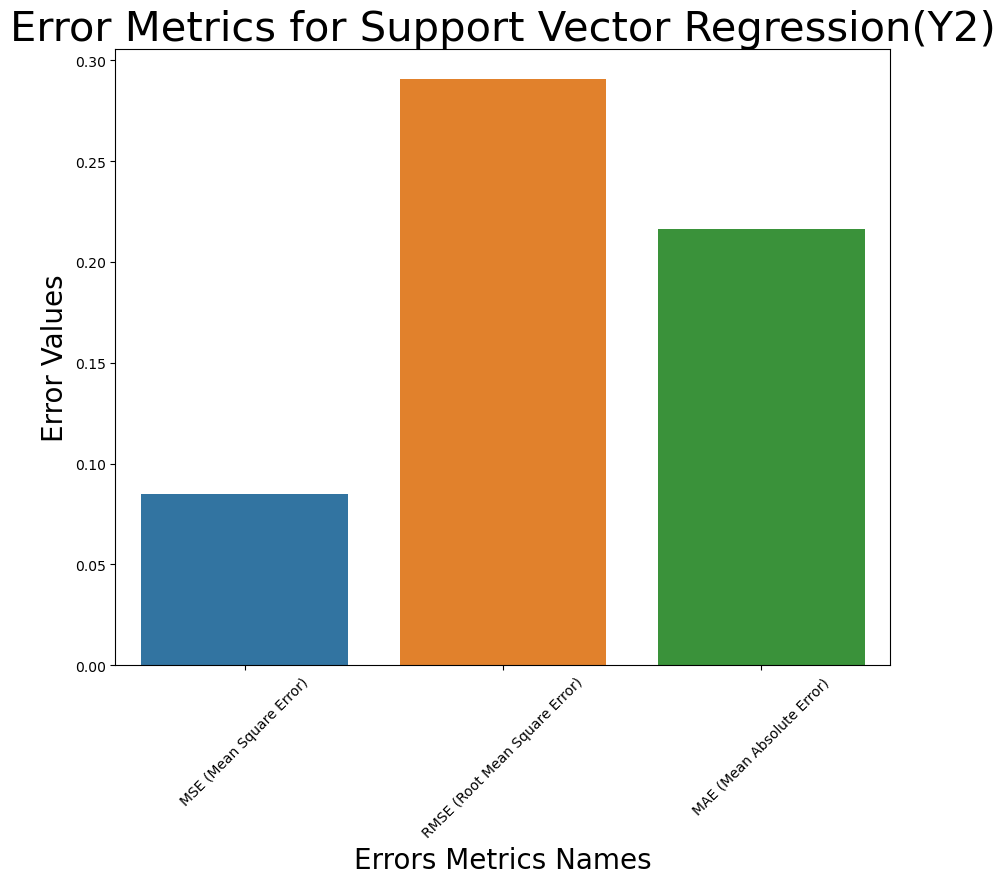

In [96]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Support Vector Regression(Y2)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

# Decision Tree Regression (Karar Ağaçları ile Regresyon)

Karar ağaçları genellikle sınıflandırmada kullanılsa da regression için de kullanılabilir. Karar ağaçları içerisinde kök ve alt yapraklar olarak ayrılır. ilk 2 yaprak genellikle verinin tahmin edilmesini en çok etkileyen özelliklerden seçilir ve belli bir sınıra göre ayrıştırılır. Bu ayrıştırma ve bütün bu alt yaprakların oluşturulması sonucu, yeni gelen veri oluşturulan ağaca göre bir yaprağın koşuluna girer ve tahminleme yapılır.

## Y1 değişkeni için Decision Tree Regression

In [97]:
Y=df.iloc[:,8:9]

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y1,Y,test_size=0.25,random_state=1)

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [100]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 7), (576, 1), (192, 7), (192, 1))

In [101]:
X_scaled=sc.fit_transform(x_list_y1)
Y_scaled=sc.fit_transform(Y)

In [102]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
y_pred=dtr.predict(X_test)
y_pred_train = dtr.predict(X_train)

In [104]:
print('Train Veri Setinin Doğruluk Skoru:', dtr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', dtr.score(X_test,Y_test))
print('Decision Tree Regression Cross Validation(K=5) R^2 Score: {}'\
      .format(cross_val_score(dtr, X_scaled, Y_scaled, cv=5, scoring='r2').mean()));
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y1 için X6 Olmadan Decision Tree Regression (7 özellik ile) R2']=cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()

Train Veri Setinin Doğruluk Skoru: 0.9988839417846377
Test Veri Setinin Doğruluk Skoru: 0.9768668327808595
Decision Tree Regression Cross Validation(K=5) R^2 Score: 0.9655675019643892
MSE: 0.023133167219140483
RMSE: 0.15209591453796675
MAE: 0.14344796032691665


In [105]:
errors=list()

In [106]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [107]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [108]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

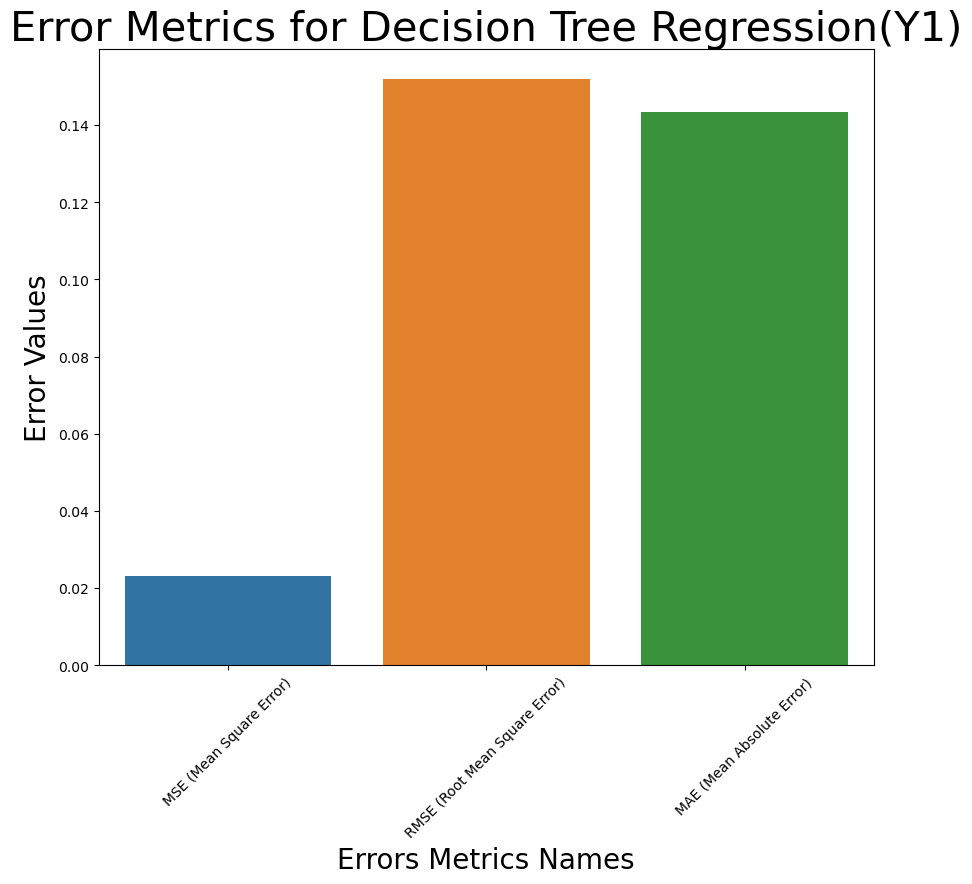

In [109]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Decision Tree Regression(Y1)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

## Y2 değişkeni için Decision Tree Regression

In [110]:
Y=df.iloc[:,9:10]

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_list_y2,Y,test_size=0.25,random_state=1)

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [113]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((576, 6), (576, 1), (192, 6), (192, 1))

In [114]:
X_scaled=sc.fit_transform(x_list_y2)
Y_scaled=sc.fit_transform(Y)

In [115]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [116]:
y_pred=dtr.predict(X_test)
y_pred_train = dtr.predict(X_train)

In [117]:
print('Train Veri Setinin Doğruluk Skoru:', dtr.score(X_train,Y_train))
print('Test Veri Setinin Doğruluk Skoru:', dtr.score(X_test,Y_test))
print('Decision Tree Regression Cross Validation(K=5) R^2 Score: {}'\
      .format(cross_val_score(dtr, X_scaled, Y_scaled, cv=5, scoring='r2').mean()));
print('MSE: {}'.format(mean_squared_error(Y_test,y_pred)))
print('RMSE: {}'.format(mean_squared_error(Y_test,y_pred,squared=False)))
print('MAE: {}'.format(mean_absolute_error(Y_test, y_pred)))
r2['Y2 için X8 ve X6 değişkenleri olmadan Decision Tree Regression R2']=cross_val_score(lr, x_list_y2, Y, cv=5, scoring='r2').mean()

Train Veri Setinin Doğruluk Skoru: 0.9749176822571579
Test Veri Setinin Doğruluk Skoru: 0.9391049253416277
Decision Tree Regression Cross Validation(K=5) R^2 Score: 0.9598663493019105
MSE: 0.06089507465837226
RMSE: 0.24676927413754787
MAE: 0.20120955034236546


In [118]:
errors=list()

In [119]:
# MSE (Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred))

In [120]:
# RMSE (Root Mean Square Error)
errors.append(mean_squared_error(Y_test, y_pred, squared=False))

In [121]:
# MAE (Mean Absolute Error)
errors.append(mean_absolute_error(Y_test, y_pred))

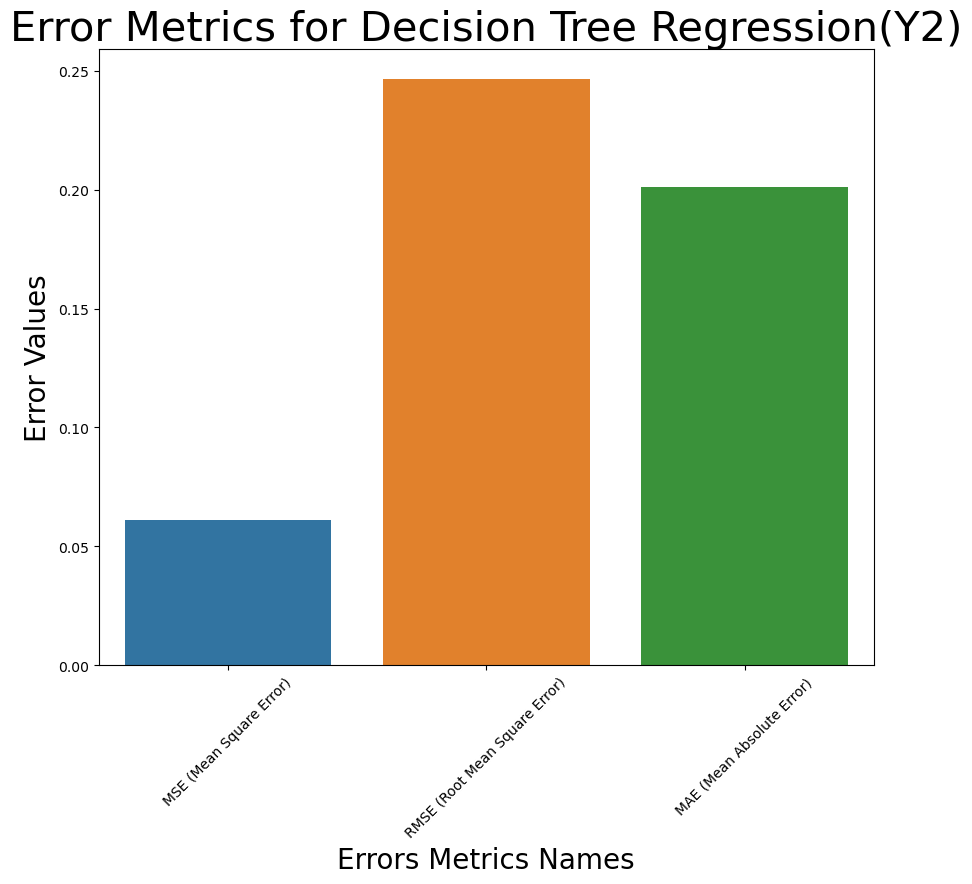

In [122]:
error_metrics=['MSE (Mean Square Error)','RMSE (Root Mean Square Error)','MAE (Mean Absolute Error)']
errors=np.array(errors)
from numpy import median
plt.figure(figsize=(10,8))
sns.barplot(y=errors,x=error_metrics)
plt.title("Error Metrics for Decision Tree Regression(Y2)",size=30)
plt.xlabel('Errors Metrics Names',size=20)
plt.xticks(rotation=45)
plt.ylabel('Error Values',size=20)
plt.show()

In [123]:
r2

{'Y1 için Tüm Özellikler ile Lineer Regression R2': 0.8878636769754561,
 'Y1 için X6 Olmadan Linear Regression (7 özellik ile) R2': 0.8919081856677012,
 'Y2 için Tüm özellikler ile Linear Regression R2': 0.8740293068865339,
 'Y2 için X8 ve X6 değişkenleri olmadan Linear Regression R2': 0.8783398894008615,
 'Y1 için X6 Olmadan Support Vector Regression (7 özellik ile) R2': 0.895888622559039,
 'Y2 için X8 ve X6 değişkenleri olmadan Support Vector Regression R2': 0.8783398894008615,
 'Y1 için X6 Olmadan Decision Tree Regression (7 özellik ile) R2': 0.895888622559039,
 'Y2 için X8 ve X6 değişkenleri olmadan Decision Tree Regression R2': 0.8783398894008615}

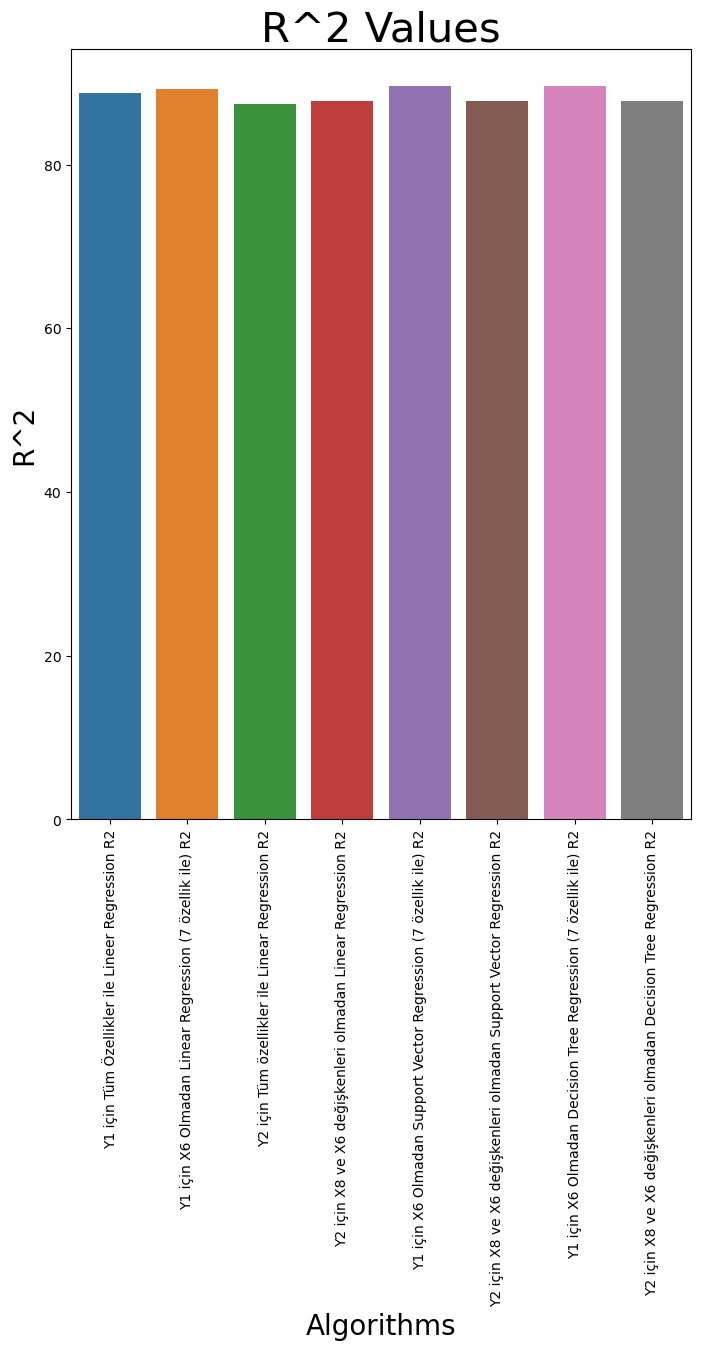

In [124]:
algo_name=['Y1 için Tüm Özellikler ile Lineer Regression R2','Y1 için X6 Olmadan Linear Regression (7 özellik ile) R2'\
           ,'Y2 için Tüm özellikler ile Linear Regression R2','Y2 için X8 ve X6 değişkenleri olmadan Linear Regression R2'\
           ,'Y1 için X6 Olmadan Support Vector Regression (7 özellik ile) R2','Y2 için X8 ve X6 değişkenleri olmadan Support Vector Regression R2',\
          'Y1 için X6 Olmadan Decision Tree Regression (7 özellik ile) R2','Y2 için X8 ve X6 değişkenleri olmadan Decision Tree Regression R2']
acc=np.array(list(r2.values()))
from numpy import median
plt.figure(figsize=(8,10))
sns.barplot(y=acc*100,x=algo_name,estimator=median)
plt.title("R^2 Values",size=30)
plt.xlabel('Algorithms',size=20)
plt.xticks(rotation=90)
plt.ylabel('R^2',size=20)
plt.show()

## Sonuç

Yapılan özellik seçimleri ve scale işlemleri ile uygulanan 3 farklı algoritma sonuçları yukarıdaki grafikte görülmektedir.

Bu sonuçlar doğrultusunda bağımlı değişken Y1 özelliğini en iyi tahmin eden algoritmalar 0.895888622559039 R^2 skoru ile; X6 Olmadan Support Vector Regression (7 özellik ile) ve X6 Olmadan Decision Tree Regression (7 özellik ile) algoritmaları olmuştur.

Bağımlı değişken Y2 özelliğini en iyi tahmin eden algoritmalar ise 0.8783398894008615 R^2 skoru ile; X8 ve X6 değişkenleri olmadan Linear Regression, X8 ve X6 değişkenleri olmadan Support Vector Regression ve X8 ve X6 değişkenleri olmadan Decision Tree Regression algoritmaları olmuştur.